In [1]:
from modecoupling import Modecoupling
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
mode = Modecoupling()
ells1 = np.arange(1, 10000, 1)
ells2 = ells1
t0 = time.time()
M = mode.components(ells1, ells2, Nchi=100)
t1 = time.time()

total = t1-t0
print(total)

19.15626883506775


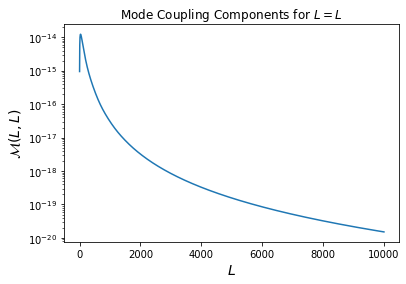

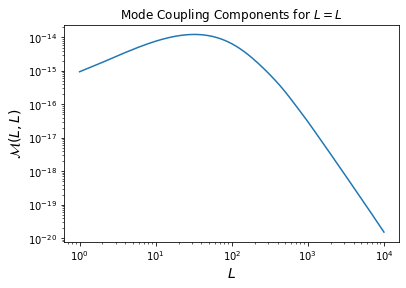

In [3]:
plt.figure()
plt.semilogy(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

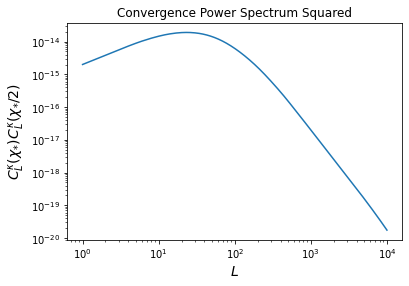

In [4]:
from powerspectra import Powerspectra
from cosmology import Cosmology
power = Powerspectra()
cosmo = Cosmology()
ells = np.arange(1, 10000, 1)
Chi_str = cosmo.get_chi_star()
Cl_kappa1 = power.get_kappa_ps_2source(ells, Chi_str, Chi_str)
Cl_kappa2 = power.get_kappa_ps_2source(ells, Chi_str/2, Chi_str/2)

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="2source")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(\chi _{*}/2)$", fontsize=14)
plt.show()

In [5]:
from bispectra import Bispectra

bi = Bispectra()
ells3 = ells1
t0 = time.time()
conv_bi_equi = bi.get_convergence_bispectrum(ells1, ells2, ells3)
t1 = time.time()

total = t1-t0
print(total)

116.06987380981445


In [6]:
conv_bi_folded = bi.get_convergence_bispectrum(ells1, ells2/2, ells3/2)

In [7]:
ells_100 = np.ones(np.size(ells1))*100
conv_bi_100 = bi.get_convergence_bispectrum(ells_100, ells2, ells3)

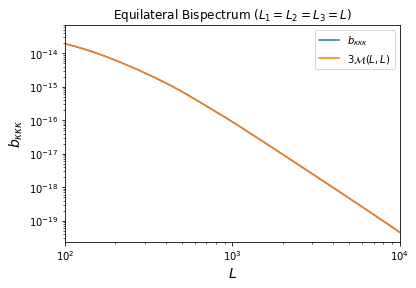

In [8]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, 3*M, label="$3\mathcal{M}(L,L)$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

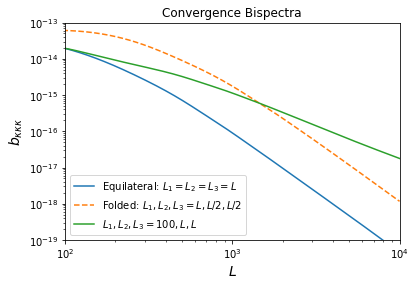

In [9]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="Equilateral: $L_1=L_2=L_3=L$")
plt.loglog(ells1, np.abs(conv_bi_folded), label="Folded: $L_1,L_2,L_3=L,L/2,L/2$", linestyle="--")
plt.loglog(ells1, conv_bi_100, label="$L_1,L_2,L_3=100,L,L$")
plt.title("Convergence Bispectra")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.ylim(1e-19, 1e-13)
plt.legend()
plt.show()